# Feed Forward Neural Networks

In this notebook, you will learn to work with simple feed forward neural networks (FFNNs).

![title](assets/feed_forward_NN.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
cm = plt.cm.gray_r

### Case: automatic mail-delivery

One of the precursors to more advanced networks and tasks is to consider the recognition of handwriting. More specifically, can you train a network to distinguish the digits 0-9? This was one of the earliest practical applications for neural networks, and we will go through it here.

In [2]:
data = datasets.load_digits() 
X = data.images
y = data.target

#### Ex.1: How many images do we have?

#### First we visualize our data

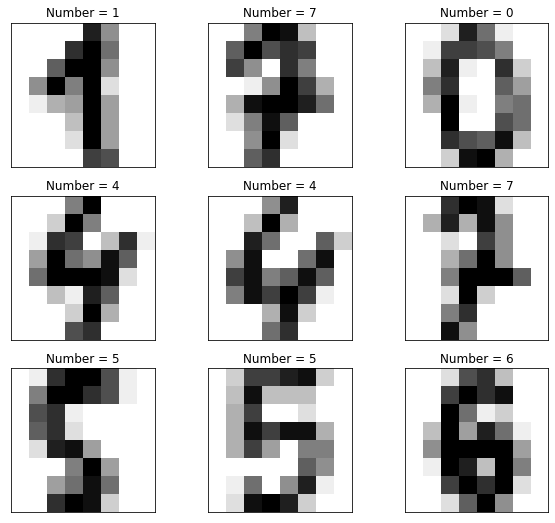

In [3]:
fig = plt.figure(figsize=(10,9))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    i = np.random.randint(0,X.shape[0])
    img = X[i]
    plt.imshow(img, cmap=cm)
    plt.xticks([]); plt.yticks([])
    plt.title(f'Number = {y[i]}')

The resolution here is kept very low as it requires less data resources to work with.

Currently each image is organized into a 8x8 grid. However, the neurons are not aranged spacially in a grid, so we have to 'unroll' the images into a single dimension to match the input layer. This can be achieved using the `reshape` method:

In [4]:
X = X.reshape(1797, 64)
X.shape

(1797, 64)

#### Before training the network, we need to split the data into a training set and a test set. 
It is very important to not evaluate a model on an independent data set (we will see why later). The split is done using `sklearn`'s `train_test_split`.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Creating a machine learning model. 

The convention in python is to treat the model as an object (an instance of a *class*. A class is just a template  of predefined methods used to create an object). 

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(50,50))

When we create the object, we also specify the network architecture (and other *hyperparameters*). This expample has 2 hidden layers, 50 neurons in each layer. Most of the hyperparameters have a behind the scenes default setting. We say that `clf` is an instance of the the object, MLPClassifier. We can check this with the `type` command.

#### Ex.2: What class is `clf` an instance of?

Each machine learning model in scikit-learn has a set of associated methods. The most important ones are `fit` and `predict`. The `fit` method is what actually trains the model. Once trained, `clf.predit()` can be called to make predictions on unseen samples. 

In [7]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Now that the model has been trained, we can try to make a prediction on a few unseen samples. You are encouraged to rerun this very code a few times and confirm that the network indeed has been properly trained with a high accuracy!

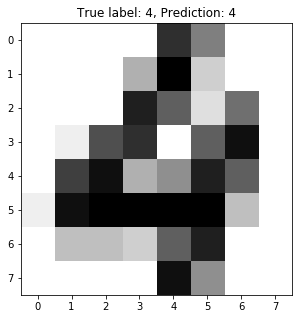

In [8]:
i = np.random.randint(0,10)
img = X_test[i].reshape(8,8) #we need to redo the flatten operation 
pred = clf.predict([X_test[i]])[0]

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=cm)
plt.title(f'True label: {y_test[i]}, Prediction: {pred}')
plt.show()

#### Notice that we make the predictions on `X_test` and not `X_train`.

To get a more proper quantification of the model, we can compute the accuracy: the relationship between the correct predictions and the total number of predictions:

$$ Accuracy = \frac{\text{correct predictions}}{\text{correct predictions + wrong predictions}} = \frac{TP + TN}{TP + FP + TN + FN}$$

In [10]:
accuracy = clf.score(X_test, y_test)

print(f'The model has a test accuracy of {round(accuracy,3)} and a train accuracy of {clf.score(X_train,y_train)}')

The model has a test accuracy of 0.978 and a train accuracy of 1.0


As you can see, the train accuracy is overly optimistic, with a perfect prediction score - this is known as overfitting - the model memorizes specific instances at the cost of generlization. However, the degree of overfitting seen here is not very severe. 

#### Summary so far: with only about 2 lines of code, you can make a neural net, train it on a dataset, and evaluate its performance

### Non-linear seperability
Compared to the perceptron in `1_Introduction_to_Neural_Networks`, this model is able to learn non-linear relationships. If the digit recognition didn't make this point clearly enough, we can demonstrate this ability applied to a synthetic dataset.

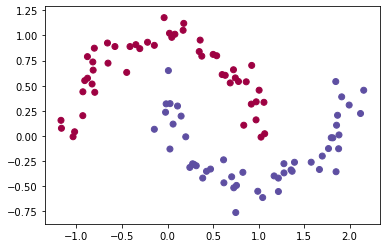

In [11]:
X, y = datasets.make_moons(noise=.1, random_state=1)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.show()

We can train another MLP to distinguish these two crescent moons. Note we ignore splitting the data to a train and test set just for simplicity.

In [12]:
clf2 = MLPClassifier((50,50,50))
clf2.fit(X, y)

C:\Users\Peder\Anaconda3\envs\cbm101\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

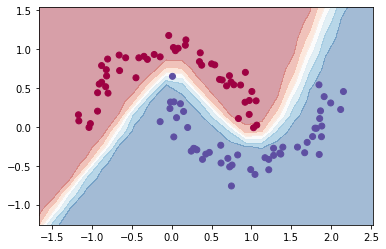

In [13]:
h = 0.2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = np.array(Z).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

Now we have made it explicit that MLPs can seperate non-linear data, so we can proceed with the MNIST example. 

In principle we could end it at here celebrating a high test accuracy, but it is more interesting to scrutinize the model, seeing *where* it went wrong, how *certain* is it of its own predictions, how much did each epoch of training change the model performance, and other questions. A good place is to plot the predicted classes versus the actual classes in a *confusion matrix*.

In [54]:
X = data.images
y = data.target
class_names = data.target_names

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = clf.predict(X_test)
print(data.target_names)
print(confusion_matrix(y_test, pred))

[0 1 2 3 4 5 6 7 8 9]
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  1  0]
 [ 0  0  0 41  0  0  0  0  1  0]
 [ 0  0  0  0 43  0  0  1  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  1 41  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  1  0  0  1  0  0  1 39  2]
 [ 0  0  0  1  0  0  0  0  0 51]]


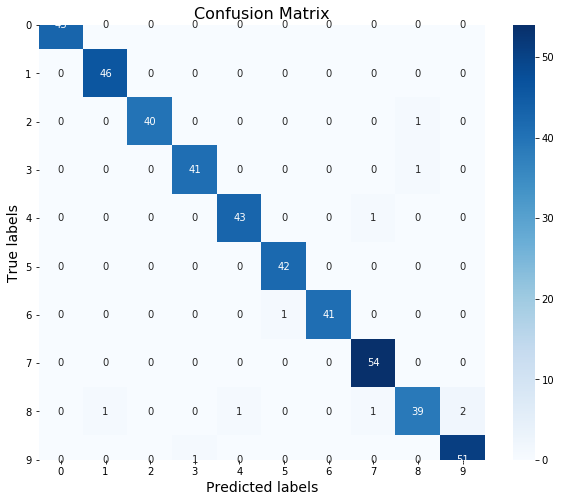

In [17]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(confusion_matrix(y_test, pred), 
            annot = True, 
            fmt = 'g',
            cmap = "Blues",
            ax = ax)

ax.set_xlabel('Predicted labels', fontsize = 14)
ax.set_ylabel('True labels', fontsize = 14)
ax.set_title('Confusion Matrix', fontsize = 16) 
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)
plt.yticks(rotation=0) 
plt.show()

#### Ex.3. Certain numbers are sometimes confused with others (e.g. 9 is predicted as 5 twice). We wish to display these wrongly classified examples. Complete the code below to visualize them. 

*Hint: `np.where` gives you the indeces in an array which satisfies a specified condition. Example: if `A = np.array([-1,1,-2,2,-3,3])`, then `np.where(A > 0)` would return the indeces `1,3,5`*

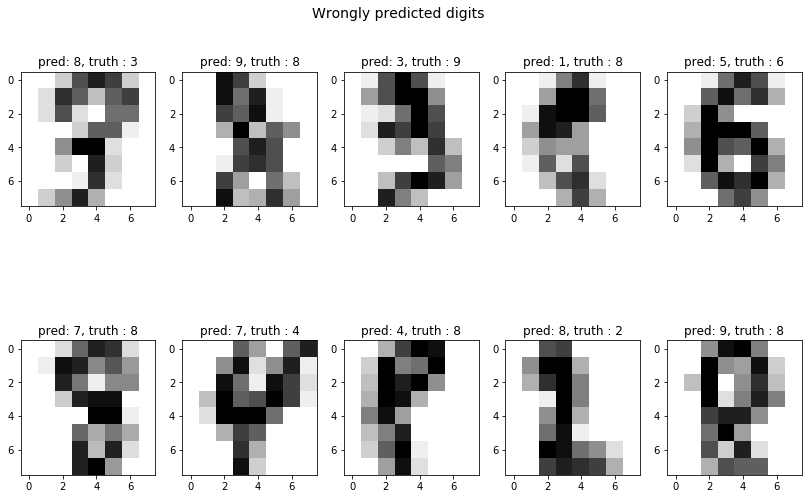

In [43]:
# wrong_pred_idx = YOUR CODE HERE

fig = plt.figure(figsize=(14,14))
plt.suptitle('Wrongly predicted digits', y=.9, fontsize=14)

for (k, i) in enumerate(wrong_pred_idx[0]):
    ax = fig.add_subplot(3,5,k+1)
    img = X_test[i].reshape(8,8)
    plt.imshow(img, cmap=cm)
    plt.title(f"pred: {pred[i]}, truth : {y_test[i]}")

Inspecting these examples (especially while considering the low resolution), they are not completely unreasonable mistakes.

The sklearn function `classification report` gives a nice summary of the performance. 

In [52]:
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        46
           2       1.00      0.98      0.99        41
           3       0.98      0.98      0.98        42
           4       0.98      0.98      0.98        44
           5       0.98      1.00      0.99        42
           6       1.00      0.98      0.99        42
           7       0.96      1.00      0.98        54
           8       0.95      0.89      0.92        44
           9       0.96      0.98      0.97        52

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In addition to accuracy, other metrics like the precision and recall provides additional information. **Precision** is defined as the fraction of predicted positives which are true positives, while **recall** (aka *sensitivity*) is the ability to pick up true positives from the data. 

$$ Precision = \frac{TP}{TP + FP} $$

$$ Recall = \frac{TP}{TP + FN} $$

It should always be a goal to achieve high on both metrics. The **f1-score** is a convenient summary statistic taking both into account, and favours balance between them. For instance, it is better for both to be .8 than one to be 1 and the other .6 (although the mean is the same). 

However, you should consider the problem at hand when judging which metric suits you the best. For example, it may be worse to misclassify a cancer patient as healthy than misclassifying a healthy person as sick.

#### Certainty
We can even look into the certainty of classification, using the method `predict_proba`. 

In [72]:
pred_prob = clf.predict_proba(X_test)

In [73]:
# some convenience functions

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    img = img.reshape(8,8)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

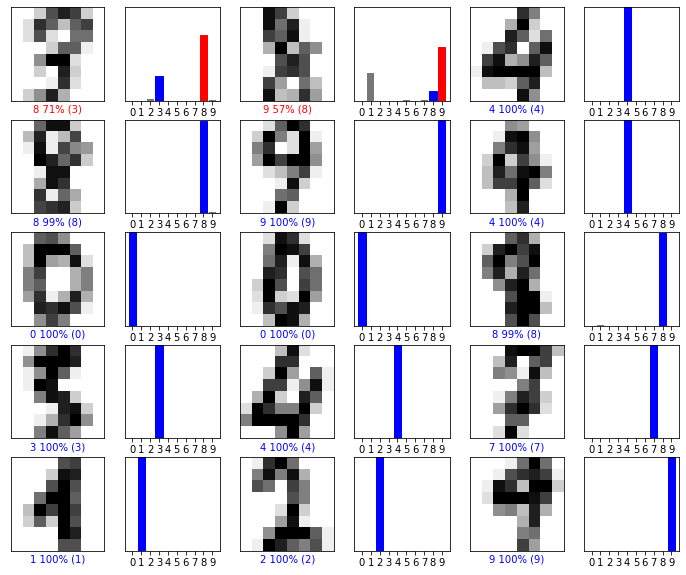

In [74]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred_prob, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred_prob, y_test)
    plt.xticks(np.arange(10))
plt.show()

Somewhat relievingly, we see that the neural net was reasonably uncertain on the harder (misclassified) cases. Even more, a noticeable peak can be seen at the correct label, showing that the network "considered" this as a viable option too. 